# Why Data Cleaning Matters in Numerical Analysis & Modeling

Data cleaning is one of the most important steps before doing **numerical analysis** or **mathematical modeling** because the quality of results depends directly on the quality of input data.  

---

### 1. Accuracy of Results
Numerical methods (integration, differentiation, optimization, regression, etc.) are highly sensitive to input values.  
- Outliers, missing values, or incorrect entries can distort averages, variances, and regression coefficients.  
- *Example:* A single erroneous high value in stock prices can shift volatility estimates, leading to incorrect option pricing in models like Black-Scholes.

---

### 2. Stability of Algorithms
Many numerical algorithms rely on well-behaved input.  
- Duplicates, inconsistent formats, or extreme values can cause instability (overflow, underflow, or non-convergence).  
- *Example:* In solving systems of equations using Gaussian elimination, even small inconsistencies in input can lead to large numerical errors.

---

### 3. Preservation of Statistical Properties
Statistical analysis assumes data follows certain patterns (normality, independence, etc.). Dirty data breaks these assumptions.  
- *Example:* Missing values filled incorrectly may bias the mean, which then alters model assumptions like the Empirical Rule or Six Sigma analysis.

---

### 4. Better Generalization of Models
Models built on unclean data may “learn” patterns from noise rather than true structure.  
- *Example:* A machine learning model trained on unclean sensor data might overfit random errors, producing poor predictions on new data.

---

### 5. Efficiency of Computation
Unnecessary or redundant data increases computational cost.  
- *Example:* Large datasets with unused or irrelevant features make matrix operations (like SVD or QR decomposition) slower and more memory intensive.

---

### 6. Interpretability & Trust
Clean data makes results easier to interpret and defend.  
- *Example:* In real-world decision-making (finance, healthcare), stakeholders must trust that conclusions are based on reliable, consistent data.

---

✅ **In short:** *Garbage in → Garbage out.*  
Numerical analysis and modeling amplify small data errors. Proper data cleaning ensures **validity, stability, and efficiency** of computations, leading to trustworthy insights.


# Common Issues in Real Datasets

When working with real-world data, it is rarely "clean." Before applying **numerical analysis** or building **models**, we must deal with imperfections in the data.  

Below are the most common issues and how they impact analysis:

---

### 1. Missing Values
- **Problem:** Gaps in the dataset due to errors in data collection or storage.  
- **Impact:** Many numerical algorithms (e.g., regression, matrix factorizations) cannot handle missing values.  
- **Example:** `NaN` entries in time series break rolling averages or statistical calculations.  
- **Handling:**  
  - Drop missing values (`pandas.DataFrame.dropna`)  
  - Fill missing values with mean/median/interpolation (`fillna`, `interpolate`)  

---

### 2. Inconsistent Data Types
- **Problem:** Columns may have mixed types (numbers stored as strings, dates stored as text).  
- **Impact:** Mathematical operations fail (e.g., trying to compute the mean of strings).  
- **Example:** `"25"` (string) and `25` (integer) in the same column.  
- **Handling:**  
  - Convert with `astype()` (e.g., `df['age'] = df['age'].astype(int)`)  
  - Use `pandas.to_datetime` for dates.  

---

### 3. Outliers
- **Problem:** Data points that are extremely far from the rest of the distribution.  
- **Impact:** Outliers can skew mean, variance, regression lines, and correlation.  
- **Example:** In salaries, a single billionaire distorts the average income.  
- **Handling:**  
  - Detect using statistical thresholds (z-score, IQR)  
  - Visualize with boxplots (`matplotlib.pyplot.boxplot`)  
  - Decide whether to remove, cap, or transform.  

---

### 4. Duplicates
- **Problem:** Duplicate rows or repeated records.  
- **Impact:** Inflates counts, biases statistical summaries, and distorts models.  
- **Example:** Customer entered twice in the database with the same ID.  
- **Handling:**  
  - Use `pandas.DataFrame.duplicated` to identify duplicates.  
  - Use `drop_duplicates()` to remove them.  

---

### 5. Noisy Strings
- **Problem:** Text fields may contain typos, extra spaces, inconsistent capitalization, or categorical labels spelled differently.  
- **Impact:** Grouping, merging, and analysis fail when categories don’t match exactly.  
- **Example:** `"USA"`, `"U.S.A."`, `"us"` appearing as different countries.  
- **Handling:**  
  - String cleaning methods: `str.strip()`, `str.lower()`, `str.replace()`  
  - Standardization with mapping dictionaries.  

---

# Tools We’ll Use

### **NumPy**
- Handle missing values (`np.nan`)  
- Perform numerical operations efficiently.  
- Detect outliers with z-scores.  

### **pandas**
- Identify and fix missing data (`isna()`, `fillna()`, `interpolate()`)  
- Detect duplicates (`duplicated()`, `drop_duplicates()`)  
- Convert data types (`astype()`)  
- Clean strings (`str` methods).  

### **matplotlib**
- Visualize data quality issues (histograms, boxplots, scatter plots).  
- Spot outliers, skewness, and unusual patterns.  

---

✅ **In summary:**  
Real datasets almost always contain missing values, inconsistent types, outliers, duplicates, and noisy strings. Cleaning them using **NumPy, pandas, and matplotlib** ensures reliable and interpretable results in numerical analysis and modeling.


# 2. Data Ingestion & Schema Inspection 

Before performing any cleaning or analysis, the first step is to **ingest (read) the data** and understand its structure (schema). This helps us spot potential issues early and optimize how the data is stored in memory.

---

## 2.1 Reading Data with pandas

The **pandas library** provides flexible functions to read a wide variety of file formats:

- **CSV files:** Most common format for tabular data.  


In [1]:
import pandas as pd
df_csv = pd.read_csv("employees.csv")

In [2]:
df_csv

,id,name,age,salary,start_date,department
0,1,Alice,25.0,50000.0,1/15/2020,HR
1,2,Bob,NaN,60000.0,3/10/2019,Finance
2,3,NaN,30.0,NaN,7/1/2021,Finance
3,4,David,45.0,80000.0,NaN,HR
4,5,Eva,NaN,70000.0,11/20/2022,Finance


**Excel files: Can read multiple sheets.**

df_excel = pd.read_excel("employees.xlsx", sheet_name="Sheet1")

### 2.2 Understanding Data Types (Schema)

Each column in a DataFrame has a **dtype** (data type).  
The main pandas dtypes are:

- **int, float** → numeric columns (e.g., age, salary).  
- **object** → usually text/string data.  
- **category** → for repeated labels, more memory-efficient.  
- **datetime64** → for dates/times.  


In [3]:
print(df_csv.dtypes)


id              int64
name           object
age           float64
salary        float64
start_date     object
department     object
dtype: object


### 💡 Why it matters:

Wrong data types (e.g., numbers stored as strings) cause errors in computations.

Correct dtypes improve performance and memory usage.

### 2.3 Memory Usage & Optimization

Large datasets can consume a lot of memory. Pandas allows **downcasting and using categories**:

In [4]:
df_csv["age"] = pd.to_numeric(df_csv["age"], downcast="integer")
df_csv["age"]

#you expect floats like 25.0 to become 25 (integer).
#But it doesn’t always happen because of missing values (NaN).

0    25.0
1     NaN
2    30.0
3    45.0
4     NaN
Name: age, dtype: float64

In [5]:
#Checking memory usage
df_csv.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5 non-null      int64  
 1   name        4 non-null      object 
 2   age         3 non-null      float64
 3   salary      4 non-null      float64
 4   start_date  4 non-null      object 
 5   department  5 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1 KB


In [6]:
#Converting repeated strings to category
df_csv["department"] = df_csv["department"].astype("category")
df_csv["department"] 

0         HR
1    Finance
2    Finance
3         HR
4    Finance
Name: department, dtype: category
Categories (2, object): ['Finance', 'HR']

In [7]:
#Checking memory usage
df_csv.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          5 non-null      int64   
 1   name        4 non-null      object  
 2   age         3 non-null      float64 
 3   salary      4 non-null      float64 
 4   start_date  4 non-null      object  
 5   department  5 non-null      category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 1.0 KB


### 2.4 Quick Exploratory Data Analysis (EDA)

After ingestion, we perform a quick **schema and data quality check**

In [8]:
#Info summary: Data types, non-null counts, memory usage.
df_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          5 non-null      int64   
 1   name        4 non-null      object  
 2   age         3 non-null      float64 
 3   salary      4 non-null      float64 
 4   start_date  4 non-null      object  
 5   department  5 non-null      category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 461.0+ bytes


In [9]:
#Descriptive statistics (numeric)
df_csv.describe()


,id,age,salary
count,5.000000,3.000000,4.000000
mean,3.000000,33.333333,65000.000000
std,1.581139,10.408330,12909.944487
min,1.000000,25.000000,50000.000000
25%,2.000000,27.500000,57500.000000
50%,3.000000,30.000000,65000.000000
75%,4.000000,37.500000,72500.000000
max,5.000000,45.000000,80000.000000


In [10]:
#Descriptive statistics (categorical)
df_csv.describe(include="object")


,name,start_date
count,4,4
unique,4,4
top,Alice,1/15/2020
freq,1,1


In [11]:
#Missing values check
df_csv.isna().sum()


id            0
name          1
age           2
salary        1
start_date    1
department    0
dtype: int64

# 3. Handling Missing Data 

Real-world datasets often contain **missing values** due to errors in collection, transmission, or storage.  
Handling missing data is critical because most numerical algorithms cannot work with `NaN` values directly.

---

## 3.1 Detecting Missing Values

- **`isna()` / `notna()`:** Detect missing entries.
- **Optional library `missingno`:** Provides quick visualizations of missingness.

```python


In [12]:
import pandas as pd
import numpy as np

# Example dataset with missing values
data = {
    "id": [1, 2, 3, 4, 5, 6],
    "name": ["Alice", "Bob", "Charlie", "Diana", "Evan", None],
    "age": [25, None, 35, 40, None, 30],
    "salary": [50000, 60000, None, 70000, 65000, None],
    "department": ["HR", "Finance", "Finance", None, "HR", "Finance"]
}

df = pd.DataFrame(data)
print(df)


   id     name   age   salary department
0   1    Alice  25.0  50000.0         HR
1   2      Bob   NaN  60000.0    Finance
2   3  Charlie  35.0      NaN    Finance
3   4    Diana  40.0  70000.0       None
4   5     Evan   NaN  65000.0         HR
5   6     None  30.0      NaN    Finance


In [13]:
# Detect missing values
df.isna()


,id,name,age,salary,department
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,True,False,False
5,False,True,False,True,False


In [14]:
# Count missing per column
df.isna().sum()


id            0
name          1
age           2
salary        2
department    1
dtype: int64

In [15]:
# Check where values are NOT missing
df.notna().sum()


id            6
name          5
age           4
salary        4
department    5
dtype: int64

## 3.2 Quantifying Missingness

It’s important to know **how much data is missing**.

In [16]:
# Percentage of missing values per column
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

#💡 If a column has >50% missing values, it may be best to drop it.

id             0.000000
name          16.666667
age           33.333333
salary        33.333333
department    16.666667
dtype: float64


## 3.3 Imputation Strategies

**1. Dropping Rows/Columns**

Works when only a few entries are missing.

In [17]:
df_drop_rows = df.dropna()   # drop rows with ANY NaN
df_drop_rows
#Only Alice’s row survives because every other row has at least one missing entry.

,id,name,age,salary,department
0,1,Alice,25.0,50000.0,HR


In [18]:
df_drop_cols = df.dropna(axis=1)  # drop entire columns
df_drop_cols

,id
0,1
1,2
2,3
3,4
4,5
5,6


**2. Filling with Constants / Mean / Median / Mode**

Use simple values when data is numeric.

Prevents shrinking dataset size.

In [19]:
# Fill with constant
df_fill_const = df.fillna({"department": "Unknown"})
df_fill_const

,id,name,age,salary,department
0,1,Alice,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance
2,3,Charlie,35.0,NaN,Finance
3,4,Diana,40.0,70000.0,Unknown
4,5,Evan,NaN,65000.0,HR
5,6,None,30.0,NaN,Finance


In [20]:
# Fill numeric with mean
df["age_mean"] = df["age"].fillna(df["age"].mean())
df

,id,name,age,salary,department,age_mean
0,1,Alice,25.0,50000.0,HR,25.0
1,2,Bob,NaN,60000.0,Finance,32.5
2,3,Charlie,35.0,NaN,Finance,35.0
3,4,Diana,40.0,70000.0,None,40.0
4,5,Evan,NaN,65000.0,HR,32.5
5,6,None,30.0,NaN,Finance,30.0


In [21]:
# Fill with median (better for skewed data)
df["salary_median"] = df["salary"].fillna(df["salary"].median())
df

,id,name,age,salary,department,age_mean,salary_median
0,1,Alice,25.0,50000.0,HR,25.0,50000.0
1,2,Bob,NaN,60000.0,Finance,32.5,60000.0
2,3,Charlie,35.0,NaN,Finance,35.0,62500.0
3,4,Diana,40.0,70000.0,None,40.0,70000.0
4,5,Evan,NaN,65000.0,HR,32.5,65000.0
5,6,None,30.0,NaN,Finance,30.0,62500.0


In [22]:
# Fill with mode (for categorical variables)
df["department_mode"] = df["department"].fillna(df["department"].mode()[0])
df

#The mode means the most frequent value in the column.

#Example: if "Finance" appears most often, then mode() returns a Series like:

,id,name,age,salary,department,age_mean,salary_median,department_mode
0,1,Alice,25.0,50000.0,HR,25.0,50000.0,HR
1,2,Bob,NaN,60000.0,Finance,32.5,60000.0,Finance
2,3,Charlie,35.0,NaN,Finance,35.0,62500.0,Finance
3,4,Diana,40.0,70000.0,None,40.0,70000.0,Finance
4,5,Evan,NaN,65000.0,HR,32.5,65000.0,HR
5,6,None,30.0,NaN,Finance,30.0,62500.0,Finance


**3. Group-wise Imputation**

Fill missing values based on categories.

In [23]:
# Example: fill missing 'salary' with median per department
df["salary_group_median"] = df.groupby("department")["salary"].transform(
    lambda x: x.fillna(x.median())
)
df

,id,name,age,salary,department,age_mean,salary_median,department_mode,salary_group_median
0,1,Alice,25.0,50000.0,HR,25.0,50000.0,HR,50000.0
1,2,Bob,NaN,60000.0,Finance,32.5,60000.0,Finance,60000.0
2,3,Charlie,35.0,NaN,Finance,35.0,62500.0,Finance,60000.0
3,4,Diana,40.0,70000.0,None,40.0,70000.0,Finance,NaN
4,5,Evan,NaN,65000.0,HR,32.5,65000.0,HR,65000.0
5,6,None,30.0,NaN,Finance,30.0,62500.0,Finance,60000.0


This code fills missing `salary` values within each department using that **department’s median salary**.
`groupby("department")` splits data into groups, and `transform` ensures the filled values align with the original rows.
So, **Finance NaNs get the Finance median**, **HR NaNs get the HR median**, etc.

**4. Forward/Backward Fill & Interpolation**

Useful for time series data.

In [24]:
# Forward fill (propagate last valid value)
df_ffill = df.fillna(method="ffill")

df_ffill

,id,name,age,salary,department,age_mean,salary_median,department_mode,salary_group_median
0,1,Alice,25.0,50000.0,HR,25.0,50000.0,HR,50000.0
1,2,Bob,25.0,60000.0,Finance,32.5,60000.0,Finance,60000.0
2,3,Charlie,35.0,60000.0,Finance,35.0,62500.0,Finance,60000.0
3,4,Diana,40.0,70000.0,Finance,40.0,70000.0,Finance,60000.0
4,5,Evan,40.0,65000.0,HR,32.5,65000.0,HR,65000.0
5,6,Evan,30.0,65000.0,Finance,30.0,62500.0,Finance,60000.0


In [25]:
# Backward fill
df_bfill = df.fillna(method="bfill")
df_bfill

,id,name,age,salary,department,age_mean,salary_median,department_mode,salary_group_median
0,1,Alice,25.0,50000.0,HR,25.0,50000.0,HR,50000.0
1,2,Bob,35.0,60000.0,Finance,32.5,60000.0,Finance,60000.0
2,3,Charlie,35.0,70000.0,Finance,35.0,62500.0,Finance,60000.0
3,4,Diana,40.0,70000.0,HR,40.0,70000.0,Finance,65000.0
4,5,Evan,30.0,65000.0,HR,32.5,65000.0,HR,65000.0
5,6,None,30.0,NaN,Finance,30.0,62500.0,Finance,60000.0


In [26]:
# Interpolation (numeric, often for time series)
df_interp = df.interpolate(method="linear")
df_interp

,id,name,age,salary,department,age_mean,salary_median,department_mode,salary_group_median
0,1,Alice,25.0,50000.0,HR,25.0,50000.0,HR,50000.0
1,2,Bob,30.0,60000.0,Finance,32.5,60000.0,Finance,60000.0
2,3,Charlie,35.0,65000.0,Finance,35.0,62500.0,Finance,60000.0
3,4,Diana,40.0,70000.0,None,40.0,70000.0,Finance,62500.0
4,5,Evan,35.0,65000.0,HR,32.5,65000.0,HR,65000.0
5,6,None,30.0,65000.0,Finance,30.0,62500.0,Finance,60000.0


# 4. Outliers & Data Validation 

Outliers are data points that deviate significantly from the majority of the dataset.  
They may indicate **errors**, **rare events**, or **true but extreme values**.

---

## 4.1 Why Outliers Matter

- **Numerical instability:** Many algorithms (mean, variance, regression) are sensitive to extreme values.  
- **Distorted results:** Outliers can skew averages and inflate standard deviations.  
- **Detection of anomalies:** Sometimes outliers are *important signals* (e.g., fraud detection, sensor failures).  

💡 *Example:* A salary dataset with one billionaire will make the average salary misleading.

---

## 4.2 Methods to Detect Outliers

### 1. Z-Score Method
- Measures how many standard deviations a point is from the mean.  
- Common rule: `|z| > 3` → potential outlier.

```python


In [27]:
# Example data
data = {"salary": [50000, 52000, 51000, 49500, 70000, 1200000]}
df = pd.DataFrame(data)

df
#Notice that most salaries are in the 50k–70k range, but one value is 1,200,000, which is much larger → likely an outlier.

,salary
0,50000
1,52000
2,51000
3,49500
4,70000
5,1200000


### Z-score Formula

$$
z = \frac{x - \mu}{\sigma}
$$

where:  
- $x$ = data point  
- $\mu$ = mean  
- $\sigma$ = standard deviation  

---

### Interpretation
- If $z \approx 0$, the value is **close to the mean**.  
- If $|z| > 3$, the value is usually considered an **outlier**.  


In [28]:
# Z-score detection
mean, std = df["salary"].mean(), df["salary"].std()
df["z_score"] = (df["salary"] - mean) / std
print(df)


    salary   z_score
0    50000 -0.417813
1    52000 -0.413537
2    51000 -0.415675
3    49500 -0.418882
4    70000 -0.375052
5  1200000  2.040958


### 🔹 Interpretation

Most salaries (50k–70k) have z-scores around -0.4 → very close to the mean in terms of standard deviations.

The 1,200,000 salary has a large positive Z-score (≈ +2 or more depending on spread) → clearly stands out as an outlier.

### 2. Modified Z-Score (based on Median Absolute Deviation, MAD)

- More robust to extreme outliers.

- Formula: `M_i = 0.6745 * (x_i - median) / MAD`

In [29]:
median = df["salary"].median()
mad = np.median(np.abs(df["salary"] - median))
df["mod_z"] = 0.6745 * (df["salary"] - median) / mad
print(df)


#The output adds a new column "mod_z" showing how far each salary is from the 
#median in terms of MAD units — values with |mod_z| > 3.5 are typically considered outliers.

    salary   z_score       mod_z
0    50000 -0.417813   -0.578143
1    52000 -0.413537    0.192714
2    51000 -0.415675   -0.192714
3    49500 -0.418882   -0.770857
4    70000 -0.375052    7.130429
5  1200000  2.040958  442.664714


### 3. IQR Rule (Interquartile Range)

Define **"fences"**:

- Lower fence = Q1 – 1.5 × IQR

- Upper fence = Q3 + 1.5 × IQR

Points outside fences are potential outliers.

In [30]:
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df["is_outlier_iqr"] = (df["salary"] < lower_fence) | (df["salary"] > upper_fence)
print(df)


    salary   z_score       mod_z  is_outlier_iqr
0    50000 -0.417813   -0.578143           False
1    52000 -0.413537    0.192714           False
2    51000 -0.415675   -0.192714           False
3    49500 -0.418882   -0.770857           False
4    70000 -0.375052    7.130429           False
5  1200000  2.040958  442.664714            True


### 4. Visual Methods

- Boxplot: Quickly shows quartiles and outliers.

- Scatter plot: Helps detect unusual points in multi-dimensional data.

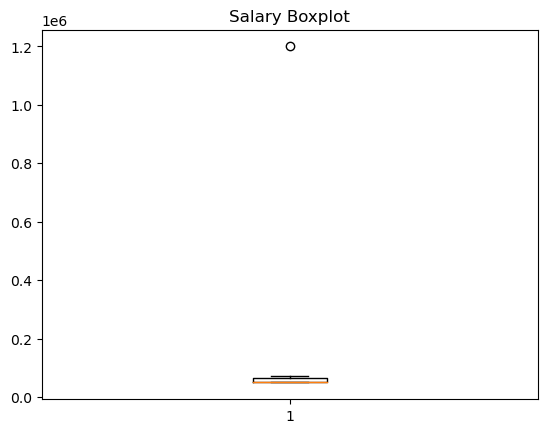

In [31]:
import matplotlib.pyplot as plt

plt.boxplot(df["salary"])
plt.title("Salary Boxplot")
plt.show()


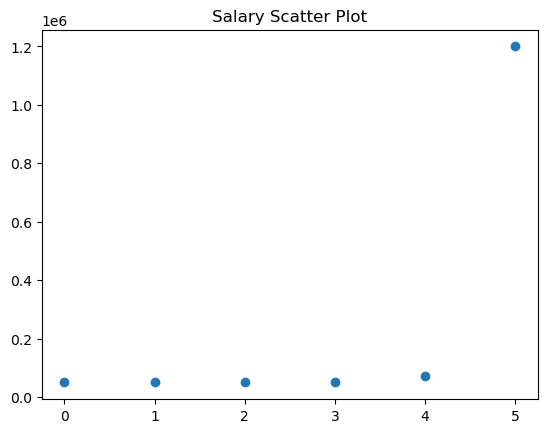

In [32]:
plt.scatter(range(len(df)), df["salary"])
plt.title("Salary Scatter Plot")
plt.show()


### 4.3 Handling Strategies

- Removal

- Drop extreme rows when clearly erroneous.

In [33]:
df_no_outliers = df[df["z_score"].abs() < 3]
df_no_outliers

,salary,z_score,mod_z,is_outlier_iqr
0,50000,-0.417813,-0.578143,False
1,52000,-0.413537,0.192714,False
2,51000,-0.415675,-0.192714,False
3,49500,-0.418882,-0.770857,False
4,70000,-0.375052,7.130429,False
5,1200000,2.040958,442.664714,True


- Capping (Winsorization)

- Replace outliers with boundary values.

In [34]:
capped = df["salary"].clip(lower_fence, upper_fence)
#Restricts (clips) all values within a given range.
capped

0    50000
1    52000
2    51000
3    49500
4    70000
5    88375
Name: salary, dtype: int64

### 4.4 Data Validation (Quick Checks)

Beyond detecting outliers, we should ensure data meets **logical expectations**:

- Assertions: Check rules hold true.

- Examples:

    - Age should be non-negative.

    - Salary should not exceed a reasonable maximum.

    - IDs should be unique.

In [35]:
# Assertion checks
assert (df["salary"] > 0).all(), "Salaries must be positive"


In [37]:
assert df["salary"].max() < 10*7, "Salary too high – potential data error"


AssertionError: Salary too high – potential data error

If the condition is True, nothing happens (the program continues).

If the condition is False (i.e., at least one salary ≤ 0), Python raises an AssertionError with the message "Salaries must be positive".

# 5. Strings, Categoricals, Dates & Deduplication 

Many real datasets contain **text fields, categorical variables, date columns, and duplicate records**.  
Cleaning and standardizing these ensures data quality, reduces memory, and improves model reliability.

---

## 5.1 Cleaning Text Fields

Text columns often contain **extra spaces, inconsistent capitalization, or typos**.  
We can clean them using pandas string methods (`.str`).


In [63]:
import pandas as pd

data = {
    "id": [1, 2, 3, 4],
    "name": [" Alice ", "bob", "CHARLIE", "Diana"],
    "city": ["new york", "NEW YORK ", "Boston", "bosTon"]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
   id     name       city
0   1   Alice    new york
1   2      bob  NEW YORK 
2   3  CHARLIE     Boston
3   4    Diana     bosTon


In [70]:
# Strip whitespace
df["name_clean"] = df["name"].str.strip()

df

,id,name,city,name_clean,city_lower,city_clean
0,1,Alice,new york,Alice,new york,new york
1,2,bob,NEW YORK,bob,new york,new york
2,3,CHARLIE,Boston,CHARLIE,boston,Boston
3,4,Diana,bosTon,Diana,boston,Boston


In [68]:
# Case normalization
df["city_lower"] = df["city"].str.strip().str.lower()
df["city_lower"]

0    new york
1    new york
2      boston
3      boston
Name: city_lower, dtype: object

In [69]:
# Token replacement (standardizing text)
#regex=False
#Tells pandas to treat "boston" as plain text, 
#not as a regex pattern — safer and faster for literal replacements.
df["city_clean"] = df["city_lower"].str.replace("boston", "Boston", regex=False)

print("\nCleaned DataFrame:")
print(df)


Cleaned DataFrame:
   id     name       city name_clean city_lower city_clean
0   1   Alice    new york      Alice   new york   new york
1   2      bob  NEW YORK         bob   new york   new york
2   3  CHARLIE     Boston    CHARLIE     boston     Boston
3   4    Diana     bosTon      Diana     boston     Boston


## 5.2 Converting to Categorical

- object columns (like city/department) take more memory.

- Converting to category saves memory and speeds up operations.

In [71]:
df["city_cat"] = df["city_clean"].astype("category")

print("\nMemory usage before/after:")
print(df.info(memory_usage="deep"))



Memory usage before/after:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          4 non-null      int64   
 1   name        4 non-null      object  
 2   city        4 non-null      object  
 3   name_clean  4 non-null      object  
 4   city_lower  4 non-null      object  
 5   city_clean  4 non-null      object  
 6   city_cat    4 non-null      category
dtypes: category(1), int64(1), object(5)
memory usage: 1.6 KB
None


## 5.3 Parsing Dates

Dates often come in different formats. Use `pd.to_datetime` to standardize.

In [85]:
date_data = {
    "raw_date": ["2025-08-20", "20/08/2025", "Aug 20, 2025", "20250820"]
}
df = pd.DataFrame(date_data)

df

,raw_date
0,2025-08-20
1,20/08/2025
2,"Aug 20, 2025"
3,20250820


In [86]:
df["parsed_date"] = pd.to_datetime(df["raw_date"], errors="coerce", dayfirst=True)
print(df)
#errors="coerce"
#Forces invalid or unrecognized dates 
#to become NaT (Not a Time, the datetime equivalent of NaN). Prevents crashes

       raw_date parsed_date
0    2025-08-20  2025-08-20
1    20/08/2025         NaT
2  Aug 20, 2025         NaT
3      20250820         NaT


C:\Users\nn43\AppData\Local\Temp\ipykernel_8656\1762580590.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["parsed_date"] = pd.to_datetime(df["raw_date"], errors="coerce", dayfirst=True)


In [87]:
from datetime import datetime

def try_parse(date_str):
    for fmt in ("%Y-%m-%d", "%d/%m/%Y", "%b %d, %Y", "%Y%m%d"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None  # if no format matches

df["parsed_date"] = df["raw_date"].apply(try_parse)
df

,raw_date,parsed_date
0,2025-08-20,2025-08-20
1,20/08/2025,2025-08-20
2,"Aug 20, 2025",2025-08-20
3,20250820,2025-08-20
